processamento finalizado.


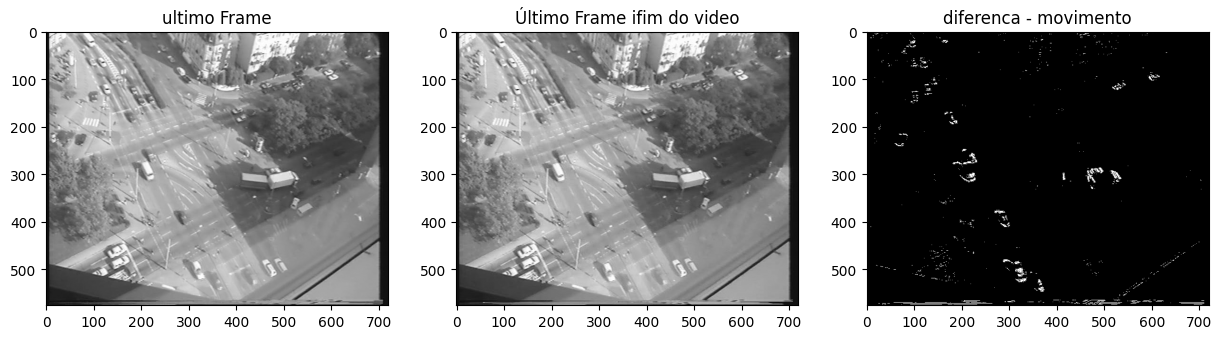

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

video = cv.VideoCapture('traffic_sequence.mpg')

if not video.isOpened():
    print("nao foi possivel abrir o video")

ret, frame_i = video.read()#primeiro quadro

frame_i_gray = cv.cvtColor(frame_i, cv.COLOR_BGR2GRAY)#primeiro quadro em tons de cinza

#guardando os quadros mais recentes
frame_i_final = frame_i_gray
frame_iplus1_final = frame_i_gray
diff_final = np.zeros_like(frame_i_gray) #imagem preta para o inicio


while True:
    ret, frame_iplus1 = video.read()

    if not ret:#se ret é false, entao o video terminou
        break

    frame_iplus1_gray = cv.cvtColor(frame_iplus1, cv.COLOR_BGR2GRAY)#converto o frame em tons de cinza

    #opeeracao diatica diferenca
    diff = cv.absdiff(frame_i_gray, frame_iplus1_gray)

    ret_thresh, diff_thresh = cv.threshold(diff, 25, 255, cv.THRESH_BINARY)#limiar

#salvo o quadsro
    frame_i_final = frame_i_gray.copy()
    frame_iplus1_final = frame_iplus1_gray.copy()
    diff_final = diff_thresh.copy()

    frame_i_gray = frame_iplus1_gray.copy()#salvo o quadro

video.release()
print("processamento finalizado.")

#ploto as figuras
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].imshow(frame_i_final, cmap='gray')
ax[0].set_title("ultimo Frame")

ax[1].imshow(frame_iplus1_final, cmap='gray')
ax[1].set_title("Último Frame ifim do video")

ax[2].imshow(diff_final, cmap='gray')
ax[2].set_title("diferenca - movimento")

plt.show()